### 기울기 소실과 기울기 폭발의 원인

In [ ]:
import numpy as np
a = np.array([[2.,3.,-1.,4.,-5.],
              [1.,3.,-7.,2.,-6.]])
a *= 2
norm = np.sqrt(np.sum(a**2)) / 2
print(norm)

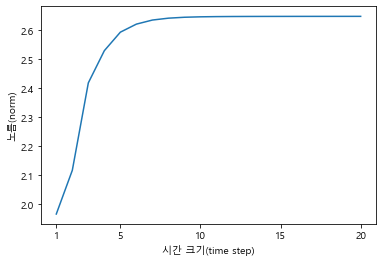

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H))
# norm = np.sqrt(np.sum(dh**2)) / N
# print(norm)

np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정

# Wh = np.random.randn(H, H)  # 평균:0, 표준편차:1
# print(Wh.T)
# dh = np.dot(dh, Wh.T)
# print(dh)
# norm = np.sqrt(np.sum(dh**2)) / N
# print(norm)
Wh = np.random.randn(H, H) * 0.7967
# Wh = np.random.randn(H, H) * 0.5
# Wh = np.random.randn(H, H)
# norm = np.sqrt(np.sum(Wh**2)) / H
# print(norm)

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)

# print(norm_list)

# # 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

### 기울기 폭발 대책

In [32]:
import numpy as np

np.random.seed(3)
# dW = np.random.rand(3, 3) * 5
dW = np.array([[2.,2.,2.],
               [3.,3.,3.],
               [4.,4.,4.]])
max_norm = 5.0

def clip_grads(grads, max_norm):
    total_norm = 0
    total_norm += np.sum(grads ** 2)
    total_norm = np.sqrt(total_norm)

    print(total_norm)
    rate = max_norm / (total_norm + 1e-6)
    print(rate)
    if rate < 1:
        grads *= rate
        
    total_norm = 0
    total_norm += np.sum(grads ** 2)
    total_norm = np.sqrt(total_norm)
    print(total_norm)

print('before:', dW.flatten())
clip_grads(dW, max_norm)
# print('after:', dW.flatten())

before: [2. 2. 2. 3. 3. 3. 4. 4. 4.]
9.327379053088816
0.5360562099476393
4.99999946394379


In [ ]:
import numpy as np

dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    print(total_norm)
    rate = max_norm / (total_norm + 1e-6)
    print(rate)
    if rate < 1:
        for grad in grads:
            grad *= rate
            
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    print(total_norm)


print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())